<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

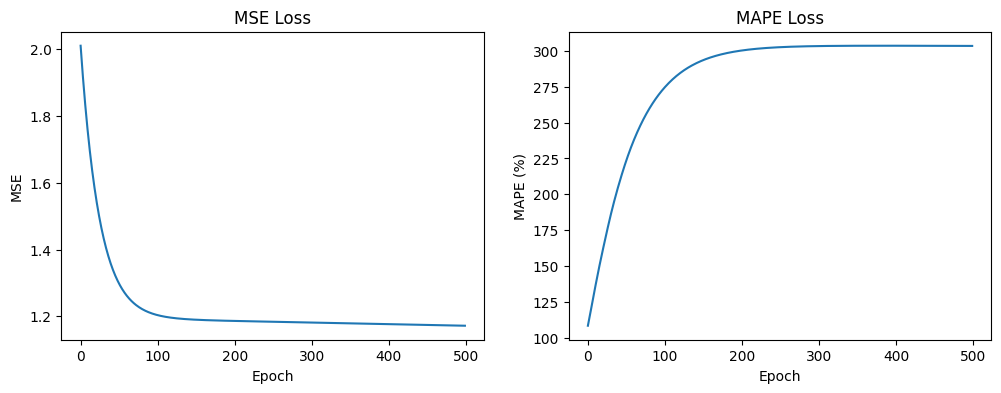

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

y = 3 * x1 - 2 * x2 + x3

X = np.array([x1, x2, x3]).T
y = y.reshape(-1, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

input_neurons = 3
hidden_neurons = 4
output_neurons = 1
learning_rate = 0.01
epochs = 500

weights_input_hidden = np.random.randn(input_neurons, hidden_neurons) * 0.1
weights_hidden_output = np.random.randn(hidden_neurons, output_neurons) * 0.1
bias_hidden = np.zeros((1, hidden_neurons))
bias_output = np.zeros((1, output_neurons))

mse_list = []
mape_list = []

for epoch in range(epochs):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = final_input

    error = y - final_output

    mse = np.mean(error**2)
    mape = np.mean(np.abs(error / y)) * 100
    mse_list.append(mse)
    mape_list.append(mape)

    d_output = error / num_samples
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title('MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(mape_list)
plt.title('MAPE Loss')
plt.xlabel('Epoch')
plt.ylabel('MAPE (%)')
plt.show()

Dataset shapes:
Data1: (100, 2), Data2: (100, 2)
Data3: (100, 2), Data4: (100, 2)
Combined data: (400, 2)

Calculating WCSS for different k values...
k=1: WCSS=448.23
k=2: WCSS=154.33
k=3: WCSS=97.84
k=4: WCSS=80.80
k=5: WCSS=54.22
k=6: WCSS=47.00
k=7: WCSS=44.36
k=8: WCSS=42.42
k=9: WCSS=34.98
k=10: WCSS=31.58


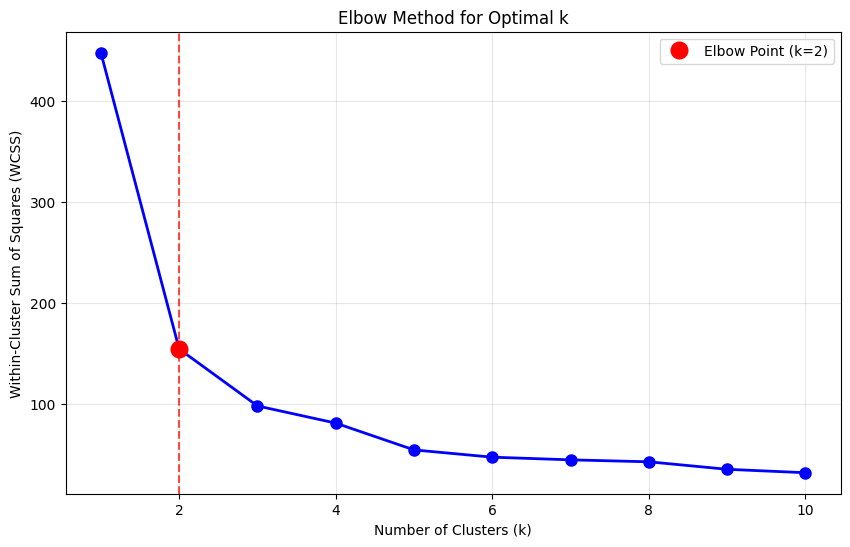


Optimal number of clusters (Elbow Point): k = 2


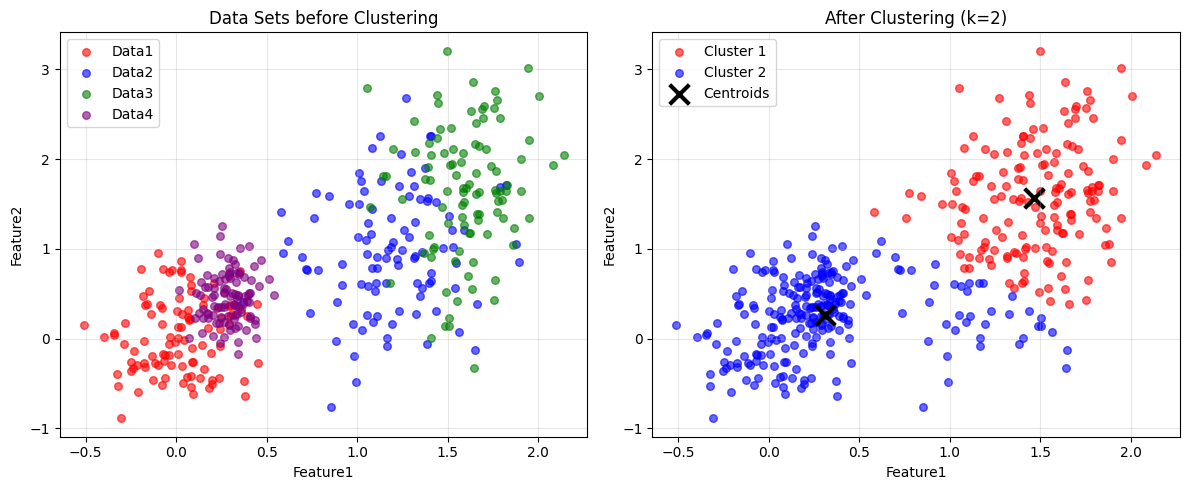


Final Clustering Results:
Optimal k: 2
Final WCSS: 154.33
Centroids:
  Cluster 1: (1.468, 1.570)
  Cluster 2: (0.309, 0.257)

Cluster sizes:
  Cluster 1: 159 points
  Cluster 2: 241 points


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate 4 datasets as specified
data1 = np.array([np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)]).T
data2 = np.array([np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)]).T
data3 = np.array([np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)]).T
data4 = np.array([np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)]).T

# Combine all datasets
all_data = np.vstack([data1, data2, data3, data4])

print(f"Dataset shapes:")
print(f"Data1: {data1.shape}, Data2: {data2.shape}")
print(f"Data3: {data3.shape}, Data4: {data4.shape}")
print(f"Combined data: {all_data.shape}")

def kmeans(data, k, max_iters=100, random_state=42):
    """
    K-means clustering implementation
    """
    np.random.seed(random_state)
    n_samples, n_features = data.shape

    # Initialize centroids randomly
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for iteration in range(max_iters):
        # Assign points to closest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Calculate within-cluster sum of squares (WCSS)
    wcss = 0
    for i in range(k):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i])**2)

    return labels, centroids, wcss

def plot_clustering_results(data, labels, centroids, k, title):
    """
    Plot clustering results
    """
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

    plt.figure(figsize=(10, 8))

    # Plot data points
    for i in range(k):
        cluster_points = data[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=colors[i % len(colors)], alpha=0.6, s=50,
                   label=f'Cluster {i+1}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1],
               c='black', marker='x', s=200, linewidths=3,
               label='Centroids')

    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Test different values of k to find elbow point
k_values = range(1, 11)
wcss_values = []

print("\nCalculating WCSS for different k values...")
for k in k_values:
    labels, centroids, wcss = kmeans(all_data, k)
    wcss_values.append(wcss)
    print(f"k={k}: WCSS={wcss:.2f}")

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_values, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True, alpha=0.3)

# Calculate elbow point using the rate of change
if len(wcss_values) >= 3:
    # Calculate second derivative to find elbow
    second_derivatives = []
    for i in range(1, len(wcss_values)-1):
        second_deriv = wcss_values[i-1] - 2*wcss_values[i] + wcss_values[i+1]
        second_derivatives.append(second_deriv)

    # Find the point with maximum second derivative
    elbow_idx = np.argmax(second_derivatives) + 1  # +1 because we start from index 1
    optimal_k = k_values[elbow_idx]

    # Highlight elbow point
    plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
    plt.plot(optimal_k, wcss_values[elbow_idx], 'ro', markersize=12,
             label=f'Elbow Point (k={optimal_k})')
    plt.legend()

plt.show()

print(f"\nOptimal number of clusters (Elbow Point): k = {optimal_k}")

# Visualize original data
plt.figure(figsize=(12, 5))

# Before clustering
plt.subplot(1, 2, 1)
colors_data = ['red', 'blue', 'green', 'purple']
labels_data = ['Data1', 'Data2', 'Data3', 'Data4']

for i, (data, color, label) in enumerate(zip([data1, data2, data3, data4], colors_data, labels_data)):
    plt.scatter(data[:, 0], data[:, 1], c=color, alpha=0.6, s=30, label=label)

plt.title('Data Sets before Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True, alpha=0.3)

# After clustering with optimal k
plt.subplot(1, 2, 2)
final_labels, final_centroids, final_wcss = kmeans(all_data, optimal_k)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
for i in range(optimal_k):
    cluster_points = all_data[final_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
               c=colors[i % len(colors)], alpha=0.6, s=30,
               label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
           c='black', marker='x', s=200, linewidths=3,
           label='Centroids')

plt.title(f'After Clustering (k={optimal_k})')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display clustering results
print(f"\nFinal Clustering Results:")
print(f"Optimal k: {optimal_k}")
print(f"Final WCSS: {final_wcss:.2f}")
print(f"Centroids:")
for i, centroid in enumerate(final_centroids):
    print(f"  Cluster {i+1}: ({centroid[0]:.3f}, {centroid[1]:.3f})")

# Show cluster sizes
print(f"\nCluster sizes:")
for i in range(optimal_k):
    cluster_size = np.sum(final_labels == i)
    print(f"  Cluster {i+1}: {cluster_size} points")

=== 원본 데이터 정보 ===
Train X shape: (900, 100, 100, 1), dtype: float64
Train Y shape: (900, 6), dtype: float64
Test X shape: (337, 100, 100, 1), dtype: float64
Test Y shape: (337, 6), dtype: float64

Train Y 처음 5개 샘플:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Train Y 최대값: 1.0, 최소값: 0.0
Processing labels with shape: (900, 6)
라벨이 이미 one-hot 인코딩되어 있습니다.
Processing labels with shape: (337, 6)
라벨이 이미 one-hot 인코딩되어 있습니다.

처리된 라벨 형태:
Train Y processed shape: (900, 6), dtype: float32
Test Y processed shape: (337, 6), dtype: float32
이미 one-hot 인코딩된 라벨을 사용합니다.
최종 라벨 형태:
Train Y onehot shape: (900, 6)
Test Y onehot shape: (337, 6)
샘플 라벨: [1. 0. 0. 0. 0. 0.]

=== 학습 시작 ===
배치 X 형태: (50, 100, 100, 1)
배치 Y 형태: (50, 6)
Epoch    0 - Train Loss: 6.9674, Train Acc: 0.1400, Test Loss: 6.2368, Test Acc: 0.1200
Epoch  250 - Train Loss: 0.2775, Train Acc: 0.9200, Test Loss: 0.5165, Test Acc: 0.7600
Epoch  500 - Train Loss: 0.0537, Train Acc: 1.000

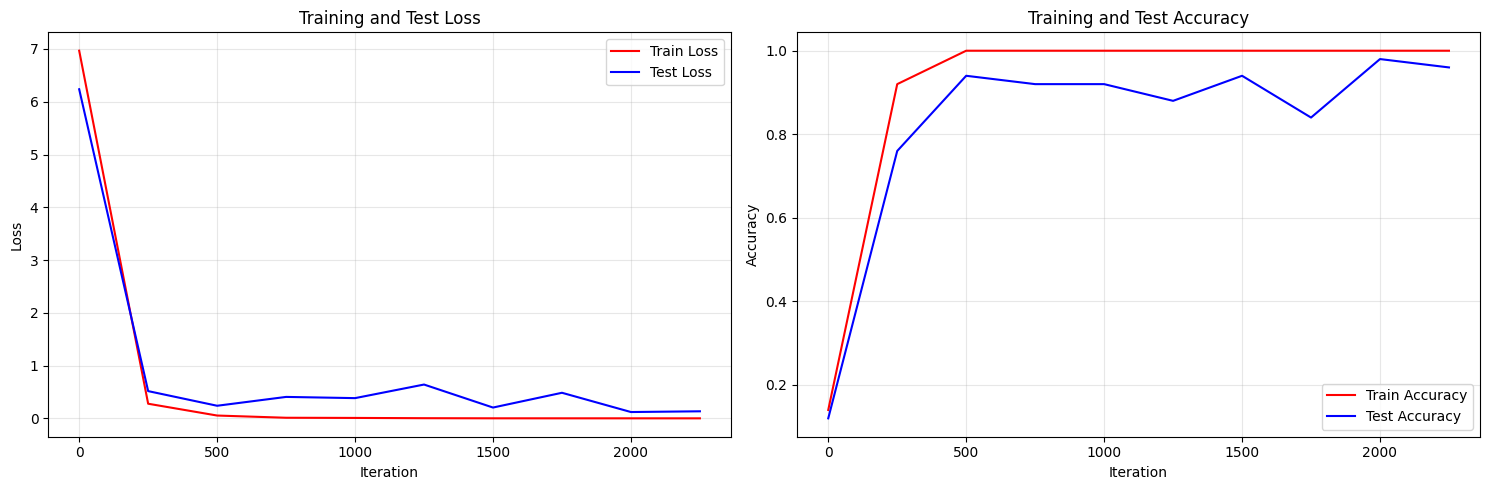


=== 최종 평가 ===
최종 테스트 정확도: 0.9169 (91.69%)


<ipython-input-12-3293288968>:235: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3293288968>:235: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3293288968>:235: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3293288968>:235: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3293288968>:235: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3293288968>:235: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu 

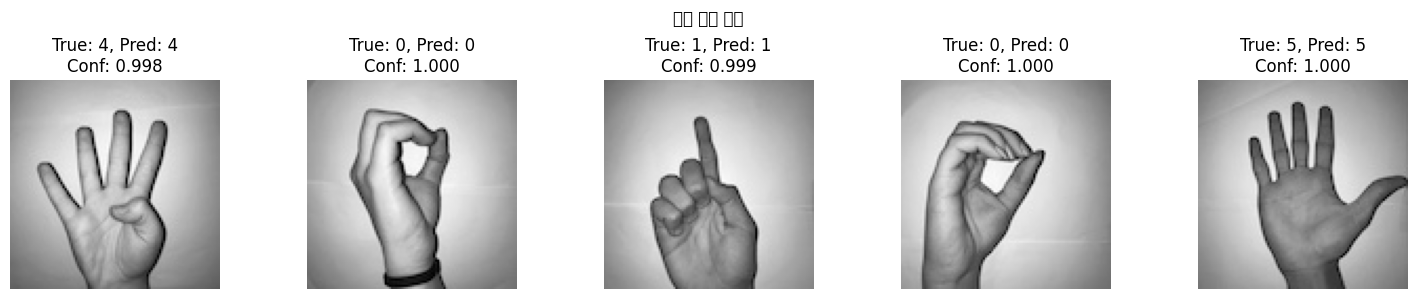


학습 완료!


In [12]:
#지속적인 런타임 오류로 새롭게 접근

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
train_x = np.load('/content/Finger_train_img.npy')
train_y = np.load('/content/Finger_train_label.npy')
test_x = np.load('/content/Finger_test_img.npy')
test_y = np.load('/content/Finger_test_label.npy')

# 데이터 정보 출력
print("=== 원본 데이터 정보 ===")
print(f"Train X shape: {train_x.shape}, dtype: {train_x.dtype}")
print(f"Train Y shape: {train_y.shape}, dtype: {train_y.dtype}")
print(f"Test X shape: {test_x.shape}, dtype: {test_x.dtype}")
print(f"Test Y shape: {test_y.shape}, dtype: {test_y.dtype}")

# 라벨 정보 자세히 확인
print(f"\nTrain Y 처음 5개 샘플:")
print(train_y[:5])
print(f"Train Y 최대값: {np.max(train_y)}, 최소값: {np.min(train_y)}")

# 데이터 전처리
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

# 이미지 reshape
train_x = train_x.reshape((train_x.shape[0], 100, 100, 1))
test_x = test_x.reshape((test_x.shape[0], 100, 100, 1))

# 라벨 처리 - 라벨이 이미 one-hot인지 확인하고 적절히 처리
def process_labels(labels):
    """라벨을 적절한 형태로 처리"""
    print(f"Processing labels with shape: {labels.shape}")

    if len(labels.shape) == 2:
        # 2D 라벨인 경우
        if labels.shape[1] == 6:
            # 이미 6개 클래스의 one-hot 형태라면
            row_sums = np.sum(labels, axis=1)
            if np.allclose(row_sums, 1.0):
                print("라벨이 이미 one-hot 인코딩되어 있습니다.")
                return labels.astype(np.float32)
            else:
                print("라벨을 정수로 변환합니다.")
                return np.argmax(labels, axis=1).astype(np.int32)
        else:
            print("예상치 못한 라벨 형태입니다.")
            return labels.flatten().astype(np.int32)
    else:
        # 1D 라벨인 경우 - 정수 라벨로 처리
        print("라벨이 정수 형태입니다.")
        return labels.astype(np.int32)

# 라벨 처리
train_y_processed = process_labels(train_y)
test_y_processed = process_labels(test_y)

print(f"\n처리된 라벨 형태:")
print(f"Train Y processed shape: {train_y_processed.shape}, dtype: {train_y_processed.dtype}")
print(f"Test Y processed shape: {test_y_processed.shape}, dtype: {test_y_processed.dtype}")

# 정수 라벨인 경우만 one-hot 인코딩
if len(train_y_processed.shape) == 1:
    print("정수 라벨을 one-hot 인코딩합니다.")
    train_y_onehot = tf.keras.utils.to_categorical(train_y_processed, 6).astype(np.float32)
    test_y_onehot = tf.keras.utils.to_categorical(test_y_processed, 6).astype(np.float32)
else:
    print("이미 one-hot 인코딩된 라벨을 사용합니다.")
    train_y_onehot = train_y_processed
    test_y_onehot = test_y_processed

print(f"최종 라벨 형태:")
print(f"Train Y onehot shape: {train_y_onehot.shape}")
print(f"Test Y onehot shape: {test_y_onehot.shape}")
print(f"샘플 라벨: {train_y_onehot[0]}")

# TensorFlow v1 설정
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 네트워크 파라미터
input_h, input_w, input_ch = 100, 100, 1
k1_h, k1_w, k1_ch = 5, 5, 32
k2_h, k2_w, k2_ch = 5, 5, 64
p1_h, p1_w = 2, 2
p2_h, p2_w = 2, 2
conv_result_size = 25 * 25 * 64
n_hidden = 100
n_output = 6

# 가중치와 편향 초기화
weights = {
    'conv1': tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

# Placeholder 정의
x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1,p1_h,p1_w,1], strides=[1,p1_h,p1_w,1], padding='SAME')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1,p2_h,p2_w,1], strides=[1,p2_h,p2_w,1], padding='SAME')

    # Flatten
    maxp2_flatten = tf.reshape(maxp2, [-1, conv_result_size])

    # Fully connected
    hidden = tf.add(tf.matmul(maxp2_flatten, weights['hidden']), biases['hidden'])
    hidden = tf.nn.relu(hidden)
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])

    return output

# 모델 구성
pred = net(x, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

# 정확도 계산
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 학습 설정
n_batch = 50
n_iter = 2500
n_prt = 250

# 세션 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("\n=== 학습 시작 ===")
loss_record_train = []
loss_record_test = []
acc_record_train = []
acc_record_test = []

for epoch in range(n_iter):
    # 학습 배치 생성
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y_onehot[batch_indices]

    # 배치 크기 확인
    if epoch == 0:
        print(f"배치 X 형태: {batch_x.shape}")
        print(f"배치 Y 형태: {batch_y.shape}")

    # 학습 실행
    sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

    # 주기적으로 손실과 정확도 출력
    if epoch % n_prt == 0:
        # 테스트 배치 생성
        test_batch_indices = np.random.choice(test_x.shape[0], size=min(n_batch, test_x.shape[0]), replace=False)
        test_batch_x = test_x[test_batch_indices]
        test_batch_y = test_y_onehot[test_batch_indices]

        # 손실과 정확도 계산
        train_loss, train_acc = sess.run([loss, accuracy], feed_dict={x: batch_x, y: batch_y})
        test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(train_loss)
        loss_record_test.append(test_loss)
        acc_record_train.append(train_acc)
        acc_record_test.append(test_acc)

        print(f"Epoch {epoch:4d} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# 학습 결과 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(loss_record_train)) * n_prt, loss_record_train, 'r-', label='Train Loss')
plt.plot(np.arange(len(loss_record_test)) * n_prt, loss_record_test, 'b-', label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(acc_record_train)) * n_prt, acc_record_train, 'r-', label='Train Accuracy')
plt.plot(np.arange(len(acc_record_test)) * n_prt, acc_record_test, 'b-', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 최종 평가
print("\n=== 최종 평가 ===")
final_test_acc = sess.run(accuracy, feed_dict={x: test_x, y: test_y_onehot})
print(f"최종 테스트 정확도: {final_test_acc:.4f} ({final_test_acc*100:.2f}%)")

# 예측 예시
n_samples = 5
sample_indices = np.random.choice(test_x.shape[0], size=n_samples, replace=False)
sample_x = test_x[sample_indices]
sample_y = test_y_onehot[sample_indices]

predictions = sess.run(tf.nn.softmax(pred), feed_dict={x: sample_x})
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_y, axis=1)

plt.figure(figsize=(15, 3))
for i in range(n_samples):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(sample_x[i].reshape(100, 100), cmap='gray')
    plt.title(f'True: {true_classes[i]}, Pred: {pred_classes[i]}\nConf: {predictions[i][pred_classes[i]]:.3f}')
    plt.axis('off')

plt.suptitle('예측 결과 샘플')
plt.tight_layout()
plt.show()

# 세션 종료
sess.close()
print("\n학습 완료!")